In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
from scipy.interpolate import interp2d
import scipy.special as special
from scipy.integrate import quad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [2]:
#load datafiles
chi_11_real_data = np.loadtxt('datafiles/chi_11_real_mod_step.txt')
chi_11_imag_data = np.loadtxt('datafiles/chi_11_imag_mod_step.txt')

chi_12_real_data = np.loadtxt('datafiles/chi_12_real_mod_step.txt')
chi_12_imag_data = np.loadtxt('datafiles/chi_12_imag_mod_step.txt')

chi_13_real_data = np.loadtxt('datafiles/chi_13_real_mod_step.txt')
chi_13_imag_data = np.loadtxt('datafiles/chi_13_imag_mod_step.txt')

chi_22_real_data = np.loadtxt('datafiles/chi_22_real_mod_step.txt')
chi_22_imag_data = np.loadtxt('datafiles/chi_22_imag_mod_step.txt')

chi_32_real_data = np.loadtxt('datafiles/chi_32_real_mod_step.txt')
chi_32_imag_data = np.loadtxt('datafiles/chi_32_imag_mod_step.txt')

chi_33_real_data = np.loadtxt('datafiles/chi_33_real_mod_step.txt')
chi_33_imag_data = np.loadtxt('datafiles/chi_33_imag_mod_step.txt')

In [3]:
#generate spline fits

start = 1.
end   = 1000.
step  = 5.

gamma = np.loadtxt('step_array.txt')

print np.size(gamma)

gam = gamma
omrat = gamma

chi_11_real_spline = interp2d(gam, omrat, chi_11_real_data)
chi_11_imag_spline = interp2d(gam, omrat, chi_11_imag_data)

chi_12_real_spline = interp2d(gam, omrat, chi_12_real_data)
chi_12_imag_spline = interp2d(gam, omrat, chi_12_imag_data)

chi_13_real_spline = interp2d(gam, omrat, chi_13_real_data)
chi_13_imag_spline = interp2d(gam, omrat, chi_13_imag_data)

chi_22_real_spline = interp2d(gam, omrat, chi_22_real_data)
chi_22_imag_spline = interp2d(gam, omrat, chi_22_imag_data)

chi_32_real_spline = interp2d(gam, omrat, chi_32_real_data)
chi_32_imag_spline = interp2d(gam, omrat, chi_32_imag_data)

chi_33_real_spline = interp2d(gam, omrat, chi_33_real_data)
chi_33_imag_spline = interp2d(gam, omrat, chi_33_imag_data)

271


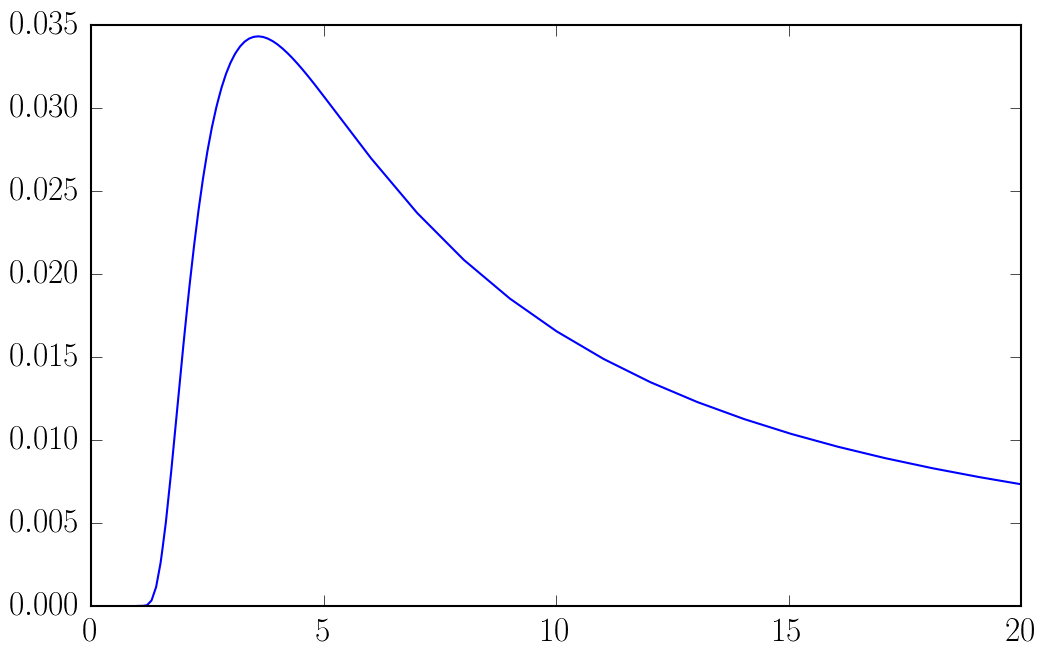

In [5]:
gamma = np.linspace(1., 20., 1000)

#pl.plot(gamma, chi_11_real_spline(gamma, 1.)) #jagged at omrat = 1
pl.plot(gamma, chi_12_real_spline(gamma, 10.)) #has a bump at omrat = 10, jagged at 1
#pl.plot(gamma, chi_13_real_spline(gamma, 1.))
#pl.plot(gamma, chi_22_real_spline(gamma, 1.))
#pl.plot(gamma, chi_32_real_spline(gamma, 1.))
#pl.plot(gamma, chi_33_real_spline(gamma, 1.))

In [6]:
epsilon0  = 1./(4. * np.pi)
e         = 4.80320680e-10
m         = 9.1093826e-28
c         = 2.99792458e10
epsilon   = -1.

n_e     = 1.
B       = 1.          
theta   = np.pi/3.   
omega_p = np.sqrt(n_e * e*e / (m * epsilon0))    
omega_c = e * B / (m * c)

#omega   = 1. * omega_c

#theta_e = 10.

p = 3.
gamma_min = 1.
gamma_max = 1000.

In [7]:
#integrands

def chi_ij_integrand(gamma, theta_e, omratio, dist_func, component, real):
    beta = np.sqrt(1. - 1./gamma**2.)
    
    if(dist_func == 0):
        dist = np.exp(-gamma/theta_e) / (4. * np.pi * theta_e**2. * special.kn(2, 1./theta_e))
    elif(dist_func == 1):
        dist = ( (p - 1.) * (-1 + 2. * gamma**2. + p * (gamma**2. - 1.))
                / (4. * np.pi * (gamma_min**(-1. - p) 
                - gamma_max**(-1. - p)) * beta * (gamma**2. - 1.)) 
                * gamma**(-3. - p) )
        
    gam_term = dist * gamma**3. * beta**3.
    
    if(real == 1):
        if(component == 11):
            spline_term = chi_11_real_spline(gamma, omratio)[0]
        elif(component == 12):
            spline_term = chi_12_real_spline(gamma, omratio)[0]
        elif(component == 13):
            spline_term = chi_13_real_spline(gamma, omratio)[0]
        elif(component == 22):
            spline_term = chi_22_real_spline(gamma, omratio)[0]
        elif(component == 32):
            spline_term = chi_32_real_spline(gamma, omratio)[0]
        elif(component == 33):
            spline_term = chi_33_real_spline(gamma, omratio)[0]
    else:
        if(component == 11):
            spline_term = chi_11_imag_spline(gamma, omratio)[0]
        elif(component == 12):
            spline_term = chi_12_imag_spline(gamma, omratio)[0]
        elif(component == 13):
            spline_term = chi_13_imag_spline(gamma, omratio)[0]
        elif(component == 22):
            spline_term = chi_22_imag_spline(gamma, omratio)[0]
        elif(component == 32):
            spline_term = chi_32_imag_spline(gamma, omratio)[0]
        elif(component == 33):
            spline_term = chi_33_imag_spline(gamma, omratio)[0]
    
    ans = gam_term * spline_term
    return ans

In [17]:
def chi_ij(theta_e, omega, dist_func, component, real):
    prefactor = 2. * np.pi * omega_p*omega_p / (omega * omega)
    ans = quad(lambda gamma: np.vectorize(chi_ij_integrand)(gamma, theta_e, omega / omega_c, 
                                                                 dist_func, component, real), 
               1., 1000)[0] * prefactor
    return ans

In [19]:
def alpha_I(theta_e, omega, dist_func):
    prefactor = 2. * np.pi * epsilon0 * omega / c
    ans = ( chi_ij(theta_e, omega, dist_func, 11, 0) * np.cos(theta)**2. 
           + chi_ij(theta_e, omega, dist_func, 33, 0) * np.sin(theta)**2.
           - 2. * chi_ij(theta_e, omega, dist_func, 13, 0) * np.sin(theta) * np.cos(theta) 
           + chi_ij(theta_e, omega, dist_func, 22, 0))
    return prefactor * ans

def alpha_Q(theta_e, omega, dist_func):
    prefactor = 2. * np.pi * epsilon0 * omega / c
    ans = ( chi_ij(theta_e, omega, dist_func, 11, 0) * np.cos(theta)**2. 
           + chi_ij(theta_e, omega, dist_func, 33, 0) * np.sin(theta)**2.
           - 2. * chi_ij(theta_e, omega, dist_func, 13, 0) * np.sin(theta) * np.cos(theta) 
           - chi_ij(theta_e, omega, dist_func, 22, 0))
    return prefactor * ans

def alpha_V(theta_e, omega, dist_func):
    prefactor = 4. * np.pi * epsilon0 * omega / c
    ans = ( chi_ij(theta_e, omega, dist_func, 12, 1) * np.cos(theta) 
           - chi_ij(theta_e, omega, dist_func, 32, 1) * np.sin(theta) )
    return prefactor * ans

In [20]:
gamma = np.linspace(1., 100., 1000)
omega = np.logspace(0., 3, 10) * omega_c

#pl.loglog(omega/omega_c, np.vectorize(alpha_V)(10., omega, 1))

print alpha_V(10., 10.*omega_c, 0)
#print chi_ij_integrand(10., 10., 1. * omega_c, 0, 11, 1)
#print chi_ij(10., 1.*omega_c, 1, 11, 1)

3.02193112077e-14


In [68]:
print -1.50643980243e-10 / -9.458639e-10
print -3.73383350756e-11 / -2.373819e-10
print -1.65461169337e-11 / -1.059536e-10
print -6.01879584912e-10 / -3.782306e-09

0.15926602151
0.157292258069
0.156163801265
0.159130325498
